In [19]:
import folium
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import re
import seaborn as sns
import spacy
import time

# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

# IPS ORIGEN

#### PRIMER ARCHIVO CORTADO CON 879 PERO FILTRADO SE QUEDAN EN 497 REGISTROS

In [4]:
# Nombre del archivo de entrada
archivo_resultados = r"D:\Cursos\REPOSITORIOS\PARA ENTREGAR_EDA\SRC\DATA\TEXT USADO PARA GEOCOORDENADAS\resultados_geolocalizacion_origen_lugares.txt"

# Leer el contenido del archivo de resultados
with open(archivo_resultados, 'r', encoding='utf-8') as file:
    contenido_resultados = file.readlines()

# Crear una lista para almacenar los datos
data = []

# Omitir la primera línea que contiene encabezados
for linea in contenido_resultados[1:]:
    # Dividir la línea en Longitud, Latitud e Info_Lugar
    partes = linea.strip().split('\t')
    
    if len(partes) == 3:
        longitud, latitud, info_lugar = partes
        data.append({
            'Longitud': float(longitud),
            'Latitud': float(latitud),
            'Info_Lugar': info_lugar
        })

# Crear un DataFrame a partir de la lista de datos
df_lugares_origen = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_lugares_origen)



# Guardar el DataFrame en un nuevo archivo CSV
df_lugares_origen.to_csv(r'D:\Cursos\REPOSITORIOS\PARA ENTREGAR_EDA\SRC\DATA\DATASETS MODIFICADOS\ip origen\geo_lugares_origen.csv', index=False)


      Longitud    Latitud                                         Info_Lugar
0    29.555740  52.658705  83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...
1    21.874273 -82.797050                     Coordenadas en el mar u océano
2    35.554545  45.445429              República Autónoma de Crimea, Ucrania
3    26.230098  50.573701  Великоомелянська сільська громада, Рівненський...
4    26.190156  50.545351  Ільпінь, Здолбунівська міська громада, Рівненс...
..         ...        ...                                                ...
874 -47.739233 -65.901628                     Coordenadas en el mar u océano
875  35.575340  45.456724              República Autónoma de Crimea, Ucrania
876  33.303067  44.370377         Sebastopol, Южный федеральный округ, Rusia
877  35.567435  45.400936              República Autónoma de Crimea, Ucrania
878  48.779024   2.007804                     Coordenadas en el mar u océano

[879 rows x 3 columns]


In [5]:
df_lugares_origen=pd.read_csv(r"D:\Cursos\REPOSITORIOS\PARA ENTREGAR_EDA\SRC\DATA\DATASETS MODIFICADOS\ip origen\geo_lugares_origen.csv")

In [6]:
df_lugares_origen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitud    879 non-null    float64
 1   Latitud     879 non-null    float64
 2   Info_Lugar  879 non-null    object 
dtypes: float64(2), object(1)
memory usage: 20.7+ KB


In [6]:
# convertimos info_lugares , analizando el texto con spcy, conocer el idioma y hacer una columna  Ciudad

# Cargar el modelo de lenguaje en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Función para clasificar las entidades en una fila
def clasificar_entidades(fila):
    doc = nlp(fila['Info_Lugar'])
    ciudades = []
    paises = []
    
    for entidad in doc.ents:
        if entidad.label_ == 'LOC':# busca localizacion de una ciudad
            ciudades.append(entidad.text)
       

    return pd.Series({'Ciudad': ', '.join(ciudades)})

# Aplicar la función a cada fila del DataFrame
df_lugares_origen['Ciudad'] = df_lugares_origen.apply(clasificar_entidades, axis=1)

# Mostrar el DataFrame resultante
df_lugares_origen


Longitud    Latitud                                         Info_Lugar  \
0    29.555740  52.658705  83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...   
1    21.874273 -82.797050                     Coordenadas en el mar u océano   
2    35.554545  45.445429              República Autónoma de Crimea, Ucrania   
3    26.230098  50.573701  Великоомелянська сільська громада, Рівненський...   
4    26.190156  50.545351  Ільпінь, Здолбунівська міська громада, Рівненс...   
..         ...        ...                                                ...   
874 -47.739233 -65.901628                     Coordenadas en el mar u océano   
875  35.575340  45.456724              República Autónoma de Crimea, Ucrania   
876  33.303067  44.370377         Sebastopol, Южный федеральный округ, Rusia   
877  35.567435  45.400936              República Autónoma de Crimea, Ucrania   
878  48.779024   2.007804                     Coordenadas en el mar u océano   

                                                Ciudad  
0    Мольча, Чыркавіцкі сельскі Савет, Provincia de...  
1                                                       
2                                              Ucrania  
3                            Великоомелянська, Ucrania  
4                                              Ucrania  
..                                                 ...  
874                                                     
875                                            Ucrania  
876                           Sebastopol, Южный, Rusia  
877                                            Ucrania  
878                                                     

[879 rows x 4 columns]

In [7]:
# Lista para almacenar índices de filas que cumplen con la condición
indices_a_eliminar = []

# Iterar sobre las filas del DataFrame
for index, row in df_lugares_origen.iterrows():
    # Verificar la condición en la columna 'Info_Lugares'
    if row['Info_Lugar'] == 'Coordenadas en el mar u océano':
        # Agregar el índice a la lista
        indices_a_eliminar.append(index)

# Eliminar las filas con los índices recopilados
df_lugares_origen.drop(indices_a_eliminar, inplace=True)

In [8]:
df_lugares_origen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 877
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitud    497 non-null    float64
 1   Latitud     497 non-null    float64
 2   Info_Lugar  497 non-null    object 
 3   Ciudad      497 non-null    object 
dtypes: float64(2), object(2)
memory usage: 19.4+ KB


#### SEGUNDO ARCHIVO DE IPS ORIGEN CON 1426 REGISTROS

In [6]:

# Lee el contenido del archivo .txt
with open(r'D:\Cursos\REPOSITORIOS\PARA ENTREGAR_EDA\SRC\DATA\TEXT USADO PARA GEOCOORDENADAS\origen\ips_origen_2vez_2_filtrado.txt', 'r') as file:
    lines = file.readlines()


# Define el patrón de expresión regular ajustado
patron = re.compile(r"(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}), Longitud: (-?\d{1,3}\.\d+), Latitud: (-?\d{1,3}\.\d+)")

# Crea listas para almacenar las coordenadas
ips = []
latitudes = []
longitudes = []

# Itera sobre las líneas y aplica el patrón
for line in lines:
    match = patron.search(line)
    if match:
        ips.append(match.group(1))
        latitudes.append(float(match.group(3)))
        longitudes.append(float(match.group(2)))

# Crea un DataFrame con las coordenadas
df = pd.DataFrame({'IP': ips, 'Latitud': latitudes, 'Longitud': longitudes})

df

IP     Latitud   Longitud
0       66.140.197.69  120.678575  24.386833
1       173.138.202.5  106.809488  10.862694
2        89.40.155.80   52.658705  29.555740
3     136.162.192.190  121.004136  14.528044
4        74.217.19.99  -82.797050  21.874273
...               ...         ...        ...
1421   197.43.117.112  105.855565  20.990637
1422  214.124.216.123  139.516996  35.620762
1423     26.36.109.26   45.400936  35.567435
1424     17.21.163.81  126.902663  37.484523
1425   78.199.217.198    2.007804  48.779024

[1426 rows x 3 columns]

In [7]:
df.to_excel(r'D:\Cursos\REPOSITORIOS\PARA ENTREGAR_EDA\SRC\DATA\DATASETS MODIFICADOS\ip origen\ips_origen_2vez_2_filtrado.xlsx', index=False)

# PINTAMOS EL MAPA CON FOLIUM

In [4]:
df_lugares_origen= pd.read_excel(r"D:\Cursos\REPOSITORIOS\PARA ENTREGAR_EDA\SRC\DATA\DATASETS MODIFICADOS\ip origen\geo_lugares_origen_final.xlsx")

In [3]:
df_lugares_origen_2= pd.read_excel(r'D:\Cursos\REPOSITORIOS\PARA ENTREGAR_EDA\SRC\DATA\DATASETS MODIFICADOS\ip origen\ips_origen_2vez_2_filtrado.xlsx')

In [5]:
df_lugares_origen

Longitud    Latitud                                         Info_Lugar  \
0    29.555740  52.658705  83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...   
1    35.554545  45.445429              República Autónoma de Crimea, Ucrania   
2    26.230098  50.573701  Великоомелянська сільська громада, Рівненський...   
3    26.190156  50.545351  Ільпінь, Здолбунівська міська громада, Рівненс...   
4    53.100078  17.903919                                       Dhofar, Omán   
..         ...        ...                                                ...   
498        NaN        NaN                                                NaN   
499        NaN        NaN                                                NaN   
500        NaN        NaN                                                NaN   
501        NaN        NaN                                                NaN   
502        NaN        NaN                                                NaN   

                                                Ciudad                  Pais  
0    Мольча, Чыркавіцкі сельскі Савет, Provincia de...               Belarus  
1                                              Ucrania                Turkey  
2                            Великоомелянська, Ucrania                  Oman  
3                                              Ucrania          Saudi Arabia  
4                                         Dhofar, Omán               Somalia  
..                                                 ...                   ...  
498                                                NaN                Russia  
499                                                NaN              Ethiopia  
500                                                NaN  United Arab Emirates  
501                                                NaN                 Syria  
502                                                NaN                 Sudan  

[503 rows x 5 columns]

In [6]:
df_lugares_origen_2

IP     Latitud   Longitud
0       66.140.197.69  120.678575  24.386833
1       173.138.202.5  106.809488  10.862694
2        89.40.155.80   52.658705  29.555740
3     136.162.192.190  121.004136  14.528044
4        74.217.19.99  -82.797050  21.874273
...               ...         ...        ...
1421   197.43.117.112  105.855565  20.990637
1422  214.124.216.123  139.516996  35.620762
1423     26.36.109.26   45.400936  35.567435
1424     17.21.163.81  126.902663  37.484523
1425   78.199.217.198    2.007804  48.779024

[1426 rows x 3 columns]

#### LUGARES_ORIGEN= MAPA SIN ZONAS DE CALOR IPS ORIGEN, LAS QUE SON REALMENTE VALODAD TRAS FILTRADO DE ZONAS AGUA Y ZONAS NO LOCALIZABLES(497 registros)


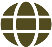
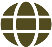
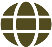
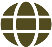
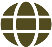
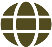
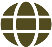
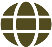
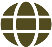
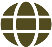
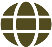
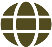
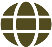
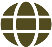
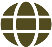
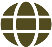
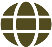
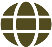
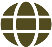
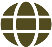
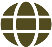
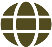
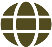
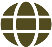
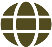
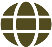
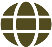
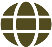
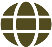
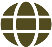
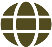
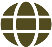
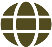
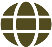
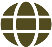
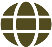
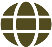
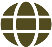
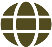
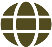
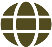
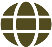
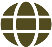
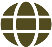
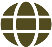
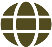
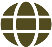
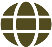
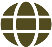
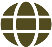
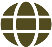
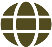
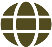
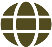
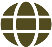
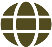
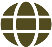
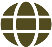
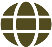
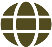
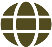
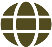
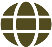
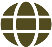
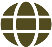
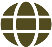
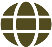
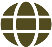
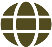
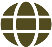
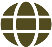
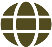
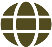
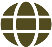
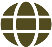
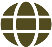
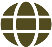
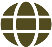
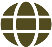
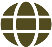
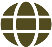
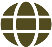
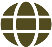
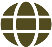
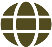
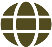
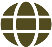
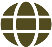
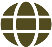
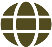
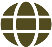
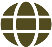
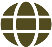
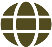
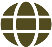
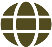
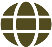
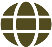
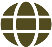
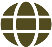
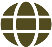
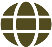
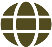
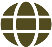
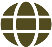
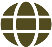
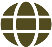
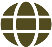
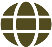
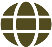
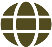
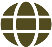
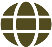
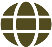
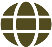
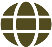
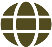
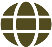
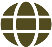
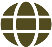
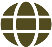
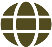
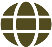
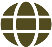
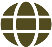
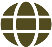
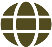
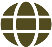
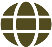
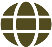
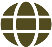
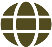
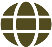
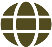
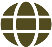
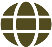
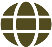
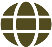
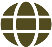
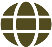
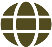
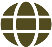
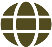
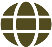
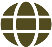
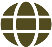
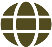
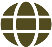
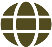
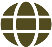
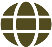
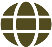
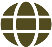
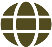
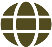
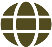
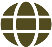
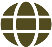
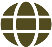
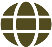
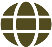
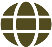
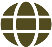
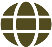
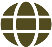
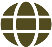
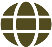
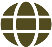
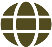
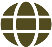
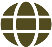
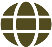
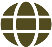
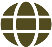
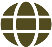
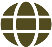
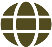
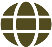
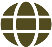
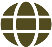
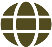
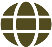
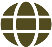
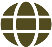
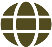
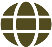
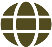
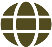
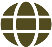
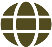
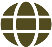
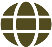
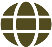
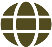
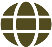
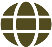
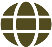
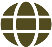
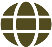
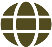
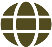
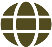
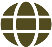
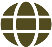
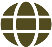
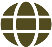
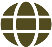
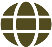
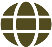
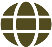
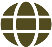
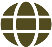
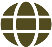
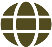
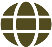
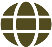
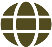
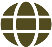
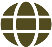
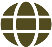
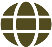
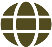
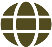
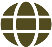
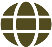
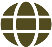
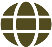
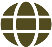
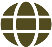
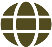
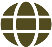
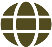
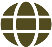
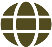
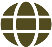
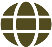
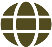
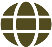
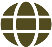
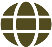
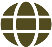
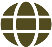
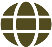
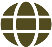
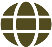
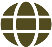
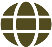
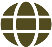
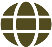
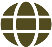
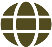
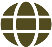
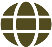
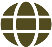
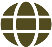
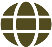
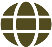
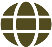
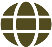
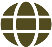
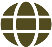
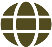
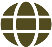
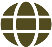
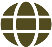
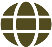
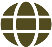
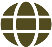
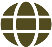
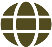
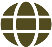
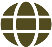
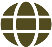
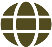
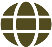
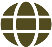
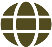
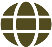
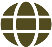
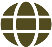
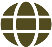
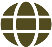
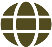
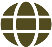
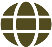
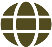
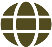
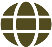
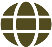
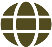
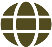
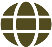
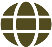
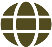
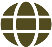
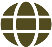
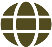
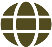
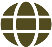
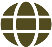
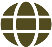
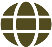
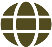
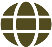
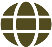
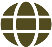
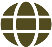
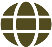
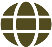
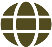
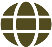
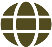
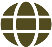
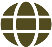
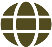
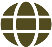
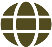
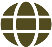
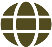
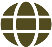
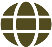
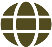
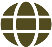
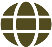
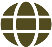
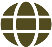
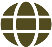
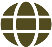
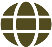
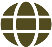
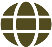
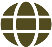
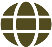
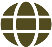
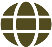
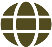
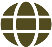
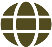
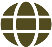
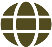
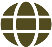
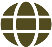
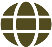
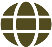
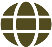
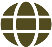
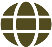
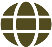
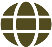
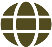
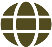
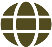
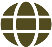
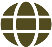
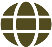
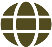
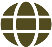
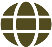
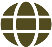
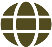
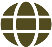
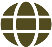
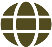
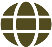
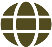
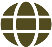
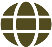
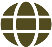
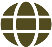
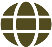
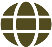
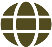
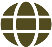
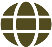
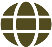
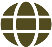
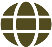
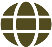
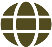
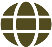
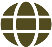
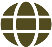
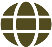
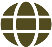
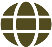
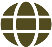
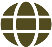
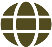
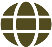
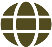
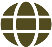
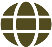
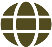
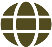
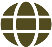
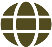
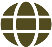
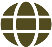
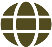
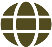
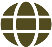
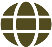
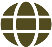
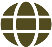
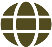
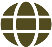
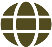
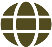
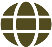
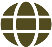
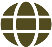
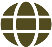
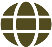
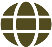
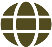
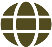
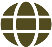
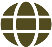
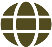
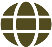
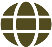
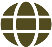
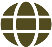
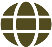
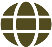
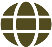
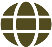
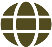
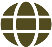
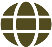
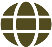
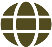
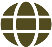
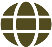
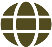
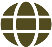
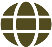
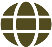
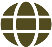
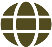
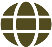
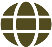
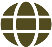
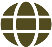
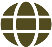
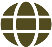
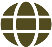
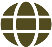
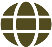
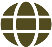
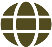
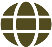
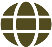
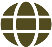
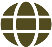
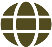
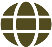
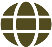
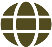
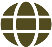
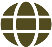
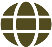
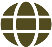
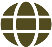
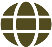
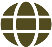
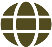
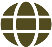
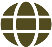
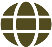
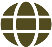
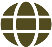
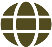
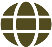
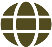
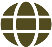
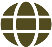
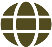
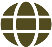
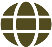
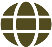
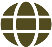
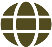
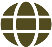
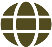
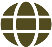
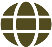
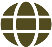
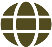
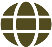
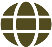
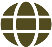
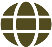
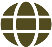
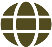
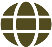
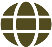

In [7]:


# Filtrar el DataFrame para quedarse solo con las filas que tienen información de geolocalización
df_lugares_filtrado = df_lugares_origen[['Longitud', 'Latitud', 'Info_Lugar', 'Ciudad',"Pais"]].dropna(subset=['Longitud', 'Latitud'])

# Convertir las columnas de longitud y latitud a una lista de ubicaciones
lista_origen = df_lugares_filtrado[['Longitud', 'Latitud', 'Ciudad',"Pais"]].values.tolist()

# Convertir cualquier valor no numérico en las columnas de longitud y latitud a NaN
for i, tupla in enumerate(lista_origen):
    for j, valor in enumerate(tupla[:2]):
        if not isinstance(valor, (int, float)):
            lista_origen[i][j] = np.nan

# Eliminar las filas que aún contienen valores no numéricos
lista_origen = [tupla for tupla in lista_origen if not any(np.isnan(tupla[:2]))]


# Crear un objeto de mapa centrado en la primera ubicación
mapa = folium.Map(location=lista_origen[0][:2], zoom_start=10)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al grupo con iconos personalizados
for tupla in lista_origen:
    # Cargar el ícono personalizado
    icono_personalizado = folium.CustomIcon(icon_image=r'C:\Users\victo\Pictures\internet_icon.png', icon_size=(30, 30))
    
    # Agregar el marcador con el icono personalizado
    folium.Marker(location=tupla[:2], popup=tupla[2], icon=icono_personalizado).add_to(marker_cluster)


# Guardar el mapa como un archivo HTML
#mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\mapa_geolocalizado_ips_origen_final.html')

# Mostrar el mapa en la notebook
display(mapa)



##### LUGARES_ORIGEN=MAPA IPS ORIGEN CO ZONA DE CALOR

In [10]:



# Filtrar el DataFrame para quedarse solo con las filas que tienen información de geolocalización
df_lugares_filtrado = df_lugares_origen[['Longitud', 'Latitud', 'Info_Lugar', 'Ciudad', "Pais"]].dropna(subset=['Longitud', 'Latitud'])

# Convertir las columnas de longitud y latitud a una lista de ubicaciones
lista_origen = df_lugares_filtrado[['Latitud', 'Longitud']].values.tolist()

# Crear un objeto de mapa centrado en la primera ubicación
mapa = folium.Map(location=lista_origen[0][::-1], zoom_start=10)# Nota: Se invierte el orden para folium (lat, lon)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)


# Agregar un mapa de calor
HeatMap(lista_origen).add_to(mapa)

# Guardar el mapa como un archivo HTML
#mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\mapa_geolocalizado_ips_origen_final_con calor.html')

# Mostrar el mapa en la notebook
display(mapa)



# LUGARES_ORIGEN 2= MAPA DE 1426 REGISTROS SIN FILTRAR

In [34]:
# Crear un mapa centrado en una ubicación media
mapa = folium.Map(location=[df_lugares_origen_2['Latitud'].mean(), df_lugares_origen_2['Longitud'].mean()], zoom_start=13)

# Añadir un marcador para cada IP en el mapa
for _, col in df_lugares_origen_2.iterrows():
    folium.Marker(location=[col['Latitud'], col['Longitud']], 
                  popup=col['IP'],
                  icon=folium.Icon(icon=r'C:\Users\victo\Pictures\internet_icon.png'), 
                  icon_size=(30, 30),
                  ).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\mapa_geolocalizado_ips_origen_final_1426.html')

# Mostrar el mapa
mapa

# MAPA DE CALOR CON LISTADO DE 1426 REGISTRO DE ORIGEN

In [36]:
# Crear un mapa centrado en una ubicación media
mapa = folium.Map(location=[df_lugares_origen_2['Latitud'].mean(), df_lugares_origen_2['Longitud'].mean()], zoom_start=13)

# Crear datos para el mapa de calor
data_heatmap = df_lugares_origen_2[['Latitud', 'Longitud']].values.tolist()

# Añadir el mapa de calor al mapa
HeatMap(data_heatmap).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\mapa_calor_geolocalizado_ips_origen_final_1426.html')

# Mostrar el mapa
mapa


In [28]:
df_lugares_origen_2.head(10)

IP     Latitud   Longitud
0    66.140.197.69  120.678575  24.386833
1    173.138.202.5  106.809488  10.862694
2     89.40.155.80   52.658705  29.555740
3  136.162.192.190  121.004136  14.528044
4     74.217.19.99  -82.797050  21.874273
5     204.38.14.40   45.445429  35.554545
6    80.83.249.115   50.573701  26.230098
7    100.51.83.228  121.531708  25.032566
8    210.78.25.184   50.545351  26.190156
9   171.25.170.142  -71.437472 -35.679361